# Build a prediction model for Salary_hike

In [39]:
import pandas as pd
salary= pd.read_csv("Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [25]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

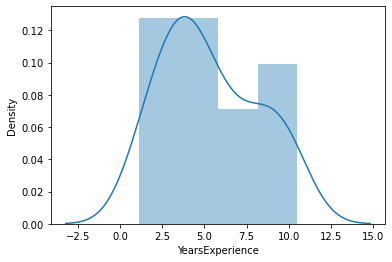

In [28]:
import seaborn as sns
sns.distplot(salary['YearsExperience'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

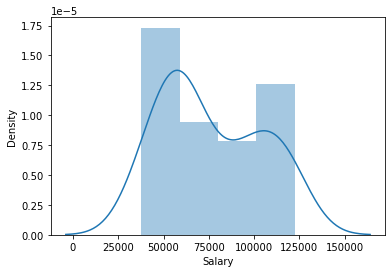

In [12]:
import seaborn as sns
sns.distplot(salary['Salary'])

In [54]:
#fitting a linear regression model
#ordinary least squares
import statsmodels.formula.api as smf
model= smf.ols("Salary~YearsExperience",data=salary).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

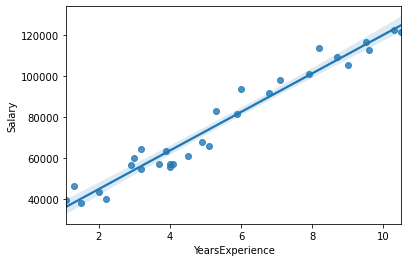

In [15]:
sns.regplot(x="YearsExperience",y="Salary", data=salary)

In [16]:
#coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
#t and p-values
print(model.tvalues,'\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [19]:
#Predict for new datapoint
#Predict for 5 and 7 years of experience
newdata=pd.Series([5,7])
newdata

0    5
1    7
dtype: int64

In [20]:
salary_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
salary_pred

,YearsExperience
0,5
1,7


In [21]:
model.predict(salary_pred)

0    73042.011806
1    91941.936449
dtype: float64

# predict delivery time using sorting time

In [108]:
delivery= pd.read_csv("delivery_time.csv")
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [113]:
#rename the columns
delivery = delivery.rename({'Delivery Time': 'Delivery','Sorting Time':'Sorting'}, axis=1)

In [114]:
delivery

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [115]:
delivery.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

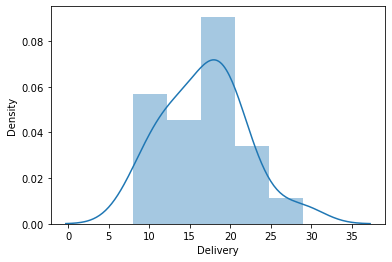

In [116]:
import seaborn as sns
sns.distplot(delivery['Delivery'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

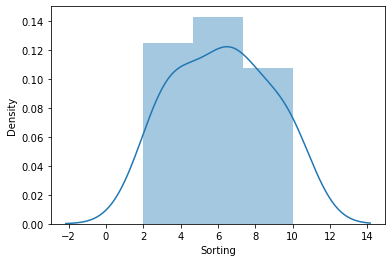

In [117]:
import seaborn as sns
sns.distplot(delivery['Sorting'])

In [118]:
#fitting a linear regression model
#ordinary least squares
import statsmodels.formula.api as smf
model= smf.ols("Delivery~Sorting",data=delivery).fit()

<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

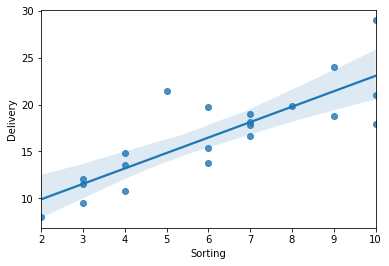

In [119]:
sns.regplot(x="Sorting",y="Delivery", data=delivery) 

In [120]:
#coefficients
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [121]:
#t and p-values
print(model.tvalues,'\n', model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [122]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [123]:
#Predict for new datapoint
#Predict for 1 and 11 sorting time
newdata=pd.Series([1,11])
newdata

0     1
1    11
dtype: int64

In [126]:
delivery_pred=pd.DataFrame(newdata,columns=['Sorting'])
delivery_pred

,Sorting
0,1
1,11


In [127]:
model.predict(delivery_pred)

0     8.231754
1    24.721953
dtype: float64